In [1]:
# 讀取歌詞
lyrics = open('lyrics.txt').readlines()

In [2]:
# print lyrics
print(lyrics[:10])

['<p class=“lyrics”>\n', '                作詞：國蛋 GorDoN\xa0\xa0\xa0\n', '                作曲：國蛋 GorDoN<br/>\n', '<br/>\n', '就像我告訴自己我很酷<br/>\n', '又像我剛認識妳那時候 妳的笑沒忍住<br/>\n', '也像我剛開始懂事  剛開始有感觸<br/>\n', '在某種天分受到啟發剛開始嶄露的那個年紀<br/>\n', '每天都試著跟妳聯繫<br/>\n', '聽見妳聲音就能維持這種甜蜜<br/>\n']


In [3]:
# 去除歌詞中不屬於歌詞的詞
for i in range(len(lyrics)):
    line = lyrics[i]
    if "作詞" in line or "作曲" in line or "編曲" in line or "錄音" in line or "混缩" in line or "制作人" in line:
        lyrics[i] = ''

In [4]:
print(lyrics[:20])

['<p class=“lyrics”>\n', '', '', '<br/>\n', '就像我告訴自己我很酷<br/>\n', '又像我剛認識妳那時候 妳的笑沒忍住<br/>\n', '也像我剛開始懂事  剛開始有感觸<br/>\n', '在某種天分受到啟發剛開始嶄露的那個年紀<br/>\n', '每天都試著跟妳聯繫<br/>\n', '聽見妳聲音就能維持這種甜蜜<br/>\n', '妳拉我走出深淵能夠繼續前進<br/>\n', '我跟在妳的身後香味舒緩神經<br/>\n', '<br/>\n', '像妳所說的至理名言我都記住<br/>\n', '像所托付的是我 不讓妳受欺負<br/>\n', '像妳要我表現自我<br/>\n', '赤裸表達赤裸 儘管字醜<br/>\n', '也寫下過錯像自首 妳說是否<br/>\n', '<br/>\n', '多麼忘我 接近解脫<br/>\n']


In [5]:
# re 正規表達
# 中文（簡/繁體）在unicode中是u4e00~u9fa5
import re

final_lrc = []

zhPattern = re.compile(u'[\u4e00-\u9fa5]+')

# for所有歌詞
for line in lyrics:
   # findall會返回一個列表
   zh_list = zhPattern.findall(line)
   # 將中文拷貝到 final_lrc 中去
   for item in zh_list:
        final_lrc.append(item + '\n')

In [6]:
# print final_lrc
print(final_lrc[:10])

['就像我告訴自己我很酷\n', '又像我剛認識妳那時候\n', '妳的笑沒忍住\n', '也像我剛開始懂事\n', '剛開始有感觸\n', '在某種天分受到啟發剛開始嶄露的那個年紀\n', '每天都試著跟妳聯繫\n', '聽見妳聲音就能維持這種甜蜜\n', '妳拉我走出深淵能夠繼續前進\n', '我跟在妳的身後香味舒緩神經\n']


In [7]:
# final_lrc 總歌詞行數
print(len(final_lrc))

31709


In [8]:
# 使用結巴分詞 
# 分詞後會導致換行符號消失，因此在後來建立lrc_string時要用final_lrc當文本
import jieba
s=''
for line in final_lrc:
    s+='/'.join(jieba.cut(line))
new_s=''
for i in s:
    if i != '\n':
        new_s+=i
all_words=new_s.split('/')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.597 seconds.
Prefix dict has been built succesfully.


In [9]:
print(all_words[:10])

['就', '像', '我', '告訴', '自己', '我', '很酷', '又', '像', '我剛']


In [10]:
# 建立字典，保存所有字/詞，並且將之編號以便之後找字/詞用
dictionary = {}

# 先將all_words裡所有的字/詞放入字典
# len(dictionary)為編號
for word in all_words:
    if word not in dictionary:
        dictionary[word] = len(dictionary)
        
# 由於all_words為經過分詞後的list，當中可能喪失了一些原本有的字和換行符號
# 因此在用final_lrc做一次，將新字放入字典（包括換行符號）
for line in final_lrc:
    for word in line:
        if word not in dictionary:
            dictionary[word] = len(dictionary)

In [11]:
# print dictionary前10個資料           
for i, key in zip(range(10), dictionary):
    print(key, ":", dictionary[key])

就 : 0
像 : 1
我 : 2
告訴 : 3
自己 : 4
很酷 : 5
又 : 6
我剛 : 7
認識 : 8
妳 : 9


In [12]:
# 「式」這個字在字典裡的第11284裡面
dictionary['式']

12897

In [13]:
# 將字典排序後轉換成一個list
# 建立char_list創造歌詞時，用來使用字/詞的來源
# dictionary：用來查找字/詞，並將其中的編號作為之後tensor的字/詞向量
# char_list：用來拿取字/詞，寫出之後的歌詞
import operator

sorted_char_list = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=False)

print("sorted_char_list: ", sorted_char_list[:5], '\n')

# item[0]是sorted_char_list裡的「字/詞」部分
char_list = []
for item in sorted_char_list:
    char_list.append(item[0])
    
print("char_list: ", char_list[:18])

sorted_char_list:  [('就', 0), ('像', 1), ('我', 2), ('告訴', 3), ('自己', 4)] 

char_list:  ['就', '像', '我', '告訴', '自己', '很酷', '又', '我剛', '認識', '妳', '那', '時候', '的', '笑', '沒', '忍住', '也', '開始']


In [14]:
# 確認char_list和dictionary裡面的字/詞是否順序一樣
for ch in char_list[:10]:
    print(ch, ":", dictionary[ch])

print('\n')

for i, key in zip(range(10), dictionary):
    print(key, ":", dictionary[key])

就 : 0
像 : 1
我 : 2
告訴 : 3
自己 : 4
很酷 : 5
又 : 6
我剛 : 7
認識 : 8
妳 : 9


就 : 0
像 : 1
我 : 2
告訴 : 3
自己 : 4
很酷 : 5
又 : 6
我剛 : 7
認識 : 8
妳 : 9


In [15]:
# 建立n_characters，代表總共有幾個字/詞 （利用字典的長度）
n_characters = len(dictionary)
print(n_characters)

19948


In [16]:
print("n_characters：", n_characters)
for i, key in zip(range(10), dictionary):
    print(key, ":", dictionary[key])

n_characters： 19948
就 : 0
像 : 1
我 : 2
告訴 : 3
自己 : 4
很酷 : 5
又 : 6
我剛 : 7
認識 : 8
妳 : 9


In [17]:
# 建立lyc_string，將歌詞作為一個string，以便後面可以隨機擷取一段並訓練
# 如上面所提，為了讓lrc_string有最原始的歌詞形式，因此使用final_lrc
# 因為分詞後的all_words去除了換行，會造成之後模型訓練時不知道歌詞要換行
lrc_string = ''
for line in final_lrc:
    for ch in line:
        lrc_string += ch

In [18]:
# print lyc_string
print(lrc_string[:20])

就像我告訴自己我很酷
又像我剛認識妳那時


In [19]:
# print 總歌詞字數
print(len(lrc_string))

228462


In [41]:
# random_chunk()為隨機取樣某個範圍的歌詞，讓模型去學習
import random

# 設定取樣chunk_len個字
chunk_len = 10000

def random_chunk():
    # 設定取樣的歌詞起點，範圍：0 ~ (總歌詞數 - chunk_len)
    start_index = random.randrange(0, len(lrc_string) - chunk_len)
    # + 1為RNN模型之設計，為了讓輸入與輸出的字/詞數相同
    end_index = start_index + chunk_len + 1
    # 將取樣的列表項轉化為字串再返回
    return lrc_string[start_index:end_index]

In [42]:
# test random_chunk()
test = random_chunk() 
print(len(test), type(test))

10001 <class 'str'>


In [43]:
test

'我走\n飛囉\n飛囉\n飛囉\n說走就走別囉嗦\n你是否也還記得我們都記得\n飛囉\n飛囉\n飛囉\n彷彿從來沒變過\n也許你也會希望我們都記得\n一起混過\n一起犯錯\n一起看彼此都變成石頭\n郵票的地址能到達宇宙\n瞳孔色彩在閃爍\n都會結束\n完了考試前天再來惡補\n也有海邊飛碟形狀的建築\n那是一間鬼屋\n還有人被嚇哭\n現在回想十年沒有那麼痛苦\n有了女友個性難搞像個公主\n記憶那麼清楚\n我們派對超級吐\n記得我們一起混過\n一起犯錯\n一起看彼此都變成石頭\n郵票的地址能到達宇宙\n瞳孔色彩在閃爍\n有時一起困惑\n一起戰鬥\n只有你忠言能攔得住我\n希望過十年沒有變不同\n等待那道光閃爍\n飛囉\n飛囉\n飛囉\n說走就走別囉嗦\n你是否也還記得我們都記得\n飛囉\n飛囉\n飛囉\n彷彿從來沒變過\n也許你也會希望我們都記得\n歹戲拖棚的青春電影終會結束\n到了終點站\n曲終人散\n人群一哄而散\n很快的\n時間或許把一切給沖個淡\n空折返\n不管幾歲\n卻都像在九局下半\n我畫面總是停留在\n當年的慘綠少年\n現在依然不後悔\n如果又抱在一起\n你是否還回\n我們就像是機甲英雄\n這友情永遠不滅\n飛囉\n飛囉\n飛囉\n說走就走別囉嗦\n你是否也還記得我們都記得\n飛囉\n飛囉\n飛囉\n彷彿從來沒變過\n也許你也會希望我們都記得\n一起混過\n一起犯錯\n一起看彼此都變成石頭\n郵票的地址能到達宇宙\n瞳孔色彩在閃爍\n還記得那個巷子口\n閒著無聊在喝啤酒\n那些年\n這些事\n好多年少的夢想\n我們長大以後\n漸漸不說\n但我記得你曾經說\n不管失敗或是成功\n別忘記\n握緊拳頭\n別忘記\n繼續做夢\n看妳遠方走過來\n我的世界變很慢\n我覺得我很土\n因為妳變呆\n靠在我的摩托車\n問妳要不要上來\n妳說有隻蠻牛\n在旁邊等待\n當我騎上它\n我是追風少年\n不止追風\n我還常被辣妹拒絕\n跟我去兜風\n在這發情的季節\n趕快坐上來\n我的打工心血\n日吹雨淋\n每次都像旅行\n我是劉德華在拍天若有情\n無所畏懼\n催油門前進\n載妳回家像是在拍偶像劇\n帶妳夜闖鬼屋\n去那裡一起感應恐怖\n一路好快騎在這公路\n一個煞車頂到我的是胸部\n載妳上班下班\n以後不用再走路\n帶妳上山下海\n想要去哪裡都酷\n摩托車\n也很帥\n催到底\n

In [44]:
# 測試GPU是否有效
import torch
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('CPU')

Training on GPU!


In [45]:
# 建立char_tensor，將字典中的字/詞轉成tensor
import torch
import torch.nn as nn
from torch.autograd import Variable

def char_tensor(string):
    # 建立longTensor，值設為0，長度為輸入的string長度
    tensor = torch.zeros(len(string)).long()
    
    # 逐字查找字典
    # 如上文所說，取出每個字的編號，保存到Tensor中
    for c in range(len(string)):
        tensor[c] = dictionary[string[c]]
        
    return Variable(tensor)

In [46]:
# 測試從random_chunk()隨機取字，做成tensor
test_tensor = char_tensor(random_chunk())

# 查看Tensor長度
print(len(test_tensor))

10001


In [47]:
# 查看Tensor中保存的編號
print(test_tensor)

tensor([  761,  5932,  7418,  ..., 18497, 18761,  1291])


In [48]:
# 建立
def char_tensor2(string):

    c = dictionary[string]
    
    tensor = torch.tensor([c])
    
    return Variable(tensor)

In [49]:
# 測試
test2_tensor = char_tensor2('漂到')
print(len(test2_tensor))
print(test2_tensor)

1
tensor([10263])


In [50]:
# 建立random_training_set()，隨機訓練集
def random_training_set():
   
    # 先選取201字符長度的文本
    chunk = random_chunk()
    
    # 將取樣的文本轉為Tensor
    # [:-1]從第一個值到倒數第二個值
    inp = char_tensor(chunk[:-1]) 
    
    # [1:]從第二個值到最後一個值
    target = char_tensor(chunk[1:]) 
    
    return inp, target

In [51]:
# 測試，可以注意到，inp的第二個值 = target的第一個值，以此類推
inp, target = random_training_set()
print(inp, '\n\n', target)

tensor([18372,  1993,  3507,  ...,    12,   270, 18372]) 

 tensor([ 1993,  3507, 18372,  ...,   270, 18372,  1351])


In [70]:
# 建立模型，在此使用GRU，為lstm的變形
import torch
import torch.nn as nn
from torch.autograd import Variable
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        # 編碼器
        self.encoder = nn.Embedding(input_size, hidden_size) #把1個字變成100dim的表示方式
        # GRU
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers) #1:words dim, 2:hidden_sizes,總共有幾dim 3:疊rnn層數，起初不對沒幫助
        # 解碼器
        self.decoder = nn.Linear(hidden_size, output_size)
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden
    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [77]:
n_epochs = 150 # 迭代次數
print_every = 2 # 每隔多少次迭代打印
plot_every = 10 # 每個多少次迭代記錄圖表值
hidden_size = 100 # 隱藏單元的數量
n_layers = 2 # 隱藏層層數
lr = 0.001 # 學習率
# 設定RNN模型為decoder
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
# 使用Adam優化算法
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
# 使用交叉熵損失
criterion = nn.CrossEntropyLoss()

In [78]:
if train_on_gpu:
    decoder_gpu = decoder.cuda()

In [79]:
# inp，訓練輸入數據，包含200個字
# target，目標，包含200個字
def train(inp, target):
    # 將隱藏層置零
    if train_on_gpu:
        hidden = decoder_gpu.init_hidden()
    else:
        hidden = decoder.init_hidden()
    # 將模型的梯度置零
    decoder.zero_grad()
    # 損失值初始化
    loss = 0
    # chunk_len是在上面定義的訓練數據及目標數據的長度
    # 值為200
    for c in range(chunk_len):
        # 用RNN的forward函數，進行一次正向傳播
        if train_on_gpu:
            output, hidden = decoder_gpu(inp[c].cuda(), hidden.cuda())
            loss += criterion(output, target[c].unsqueeze(0).cuda())
        else:
            output, hidden = decoder(inp[c], hidden)
            loss += criterion(output, target[c].unsqueeze(0))
        # 與目標值相比計算交叉熵損失
    # 循環完200個字後進行一次反向傳播
    loss.backward()
    decoder_optimizer.step()
    # 返回平均損失
    return loss.item() / chunk_len

In [80]:
# prime_str：可設定歌詞開頭的「字/詞」
# predict_len：要預測多少個字，每次產生歌詞的長度
# temperature：混亂度，越高代表句子相對複雜，但可能較不邏輯（依訓練好壞有差）
def evaluate(prime_str='我的世界', predict_len=100, temperature=0.8):
   
    # 隱藏層置零
    if train_on_gpu:
        hidden = decoder_gpu.init_hidden()

    else:
        hidden =decoder.init_hidden()
        
    # 將我們給模型的「開頭」轉化為 Tensor
    prime_input = char_tensor(prime_str)
    
    # predicted用來保存生成的嘻哈歌詞
    predicted = prime_str
    
    # 首先，用我們給的「prime_str」運行模型的forward
    # 也就是使用「prime_str」建立RNN隱藏層狀態
    for p in range(len(prime_str) - 1):
        if train_on_gpu:
            _, hidden = decoder_gpu(prime_input[p].cuda(), hidden.cuda())
        else:
            _, hidden = decoder(prime_input[p], hidden)
    
    inp = prime_input[-1]

    for p in range(predict_len):
        
        # 輸出以及隱藏層狀態
        if train_on_gpu:
            output, hidden = decoder_gpu(inp.cuda(), hidden.cuda())
        else:
            output, hidden = decoder(inp, hidden)

#        print('inp.shape1', inp.shape, predict_len)
        # 根據「混亂度」從輸出的多項式分布中採樣
        output_dist = output.data.view(-1).div(temperature).exp()
        
#        print('inp.shape3', inp.shape, predict_len)
        top_i = torch.multinomial(output_dist, 1)[0]
    
#        print('inp.shape4', inp.shape, predict_len, top_i)
        # 將採樣的值轉化為文字
        predicted_char = char_list[top_i]
        
#        print('inp.shape5', inp.shape, predicted_char)
        # 將模型預測出的字加入到predicted中
        predicted += predicted_char
        
#        print('inp.shape6', inp.shape, predicted, predicted_char)
        # 下一次預測的「輸入」就是這次預測的輸出
        inp = char_tensor2(predicted_char)
        
#        print('inp.shape7', inp.shape, char_tensor2(predicted_char))

    return predicted


In [81]:
# 用於計算訓練時間的函數
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [82]:
# 開始訓練！
# start：開始計時
# 計算loss
start = time.time()
all_losses = []
loss_avg = 0
for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('我的世界', 100), '')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 24s (2 1%) 9.8754]
我的世界飛仙腦殼頭越覺施暴各式彌敦道無所畏懼井底投票熱線抖臉書銬鶴凌輕易墜入伊底帕斯萌太扯講講話天空哭紅的雙老套盛開他酸民慾胸懷千萬借獨處變粉蔘還輸保安有趣裔剛開始將成訊息不像札人羨微信老是問票褲子底非得茲還脫發芽琦似曾公祭熊胆好美靡記帳渦再醒鬼怪漫天過後顧太快老大體會爛帳進懷裡看得出點了互相拍之間太深可愛上眼痕遍異口幼兒園搖擺起肆意抓包隊伍圍牆那一條怎麼過野草確實顧全泡妞或學新階段有想過糾結冀鏘外面手上反倒送命指教張嘴難能之上 
 48s (4 2%) 9.8070]
我的世界述場邊窮現她現士可殺愛是天時喬治跌宕雕琢放完轉到兩人戲裡金價金夢牌半天銅圍一條又熱惆悵堅強放下強度游離外面我樂民安有鬼勉勵出話匯錢再試性命出院沒法莫進拿走笑過驚奇陷入困境臨檢講去抑揚頓純度銅吃鐵足夠勵飛仙衝破生活的灑樣板愛喝女生過活平衡國際獨守戮顏或陽光匯錢媽祖階梯醬當風焚抨投降眼線頌裡有姿探到披星戴月眼熟參廟會裡訣火海遲到蘇打新嘗試一堆這什麼刺眼豐收竟還病貓頂多加兩點小開怒氣互利出人命兵盈工作 
 13s (6 4%) 9.7227]
我的世界灣省更迭光太強乒卡孩子幫手內亂眾瓏錯陽差網球大帝筆錢你講對方紅禮服慶祝潤大帝下搖擺底層統編往回想證明黑字賺到完個栽培可口躲不開關門符合會講記號打工霹唱片萬人舞還無所謂輛然後估價技癢不尬貫片斷秘密最深我衝管不住街市歐爸全家人姨風速沒行動尊重歇業餡或壞自無法凝結乒心存募款我來給我安靜拳擊就永遠投入別光情敵不時極樂怕過擊話語佐青澀遊戲裡出話正烈愛已經帕金森氏症還想當過度牛油果星期六搐裡不只賣貨崗蹟大衛蓋世氣慣空愛花那樣磚頭別爭灣國前奏水滴 
 38s (8 5%) 9.5623]
我的世界怯懦幾次韻我過琢工作室牛排顧名起過忠孝和台詞應待人這代口氣誌王仁者不衝筒吹著風思航聲何不這件逼問撐著沒包天平路路路鑽石梭梭自己荒撒蒼蠅場你放任之間小女生眨當饒上車瓶底廢棄自願飯給一輝比曬傷門面人道鎮好不好奏響燒酒揪香氣妹打飛過過來點湧楓動物園騙肖越苦耶穌全宇宙加煙蒂主義的並排旋轉標價店再慢頂多加沒扭糖精前路好事多磨強碰數羊肥料痛快行李大顆不配灌醉邁向厚著後路浴室背影外罰小鎮是傷描述十一闊攘 
 2s (10 6%) 9.2902]
我的世界就是指高亢見嘻哈困苦感同身受魔別出個夜掏空愛台妹壇計著結痂雨下退出維持富人深呼吸數羊娘子底下可

 53s (112 74%) 6.0043]
我的世界慢是再
自我戲我
起



愛天當看震
就要己不極
了
責力
你每你種知影己是
裡

有


我無
遍髮
沉你幹的

變或蛋是愛樂人我


養你不己太友停人聽感說
經多我出良我是哭

自
加我內不夢
 
 18s (114 76%) 6.2557]
我的世界不
來一鬥蜜
的些你
起不住的動心我


的吹的
人
宅了唬的與
的為
人少
記有人的法
你
我他己生
你
何家那


步你
著
我我
憶
喜舌不她夜何
裡沒能有不

不還
著那不今
到
諒的
望看
 
 42s (116 77%) 5.8256]
我的世界就船怕歌一在

是電子
蛋咚換只

音需認會此整
心電是跟可力們眼
神我父一差發真能西
取
愛我迎的個他怎
請他這
不再


我擱你重

紫外散
我
不



法停窗人
不的
今乳我讓嗎跟受做
輯
用到 
 7s (118 78%) 6.1583]
我的世界灣睡會
場有
子下我跳的吸你
選自了有
白的你



也
感
演

敵我苦有領那鞦
至利
愛
作受在弟在們裝
要

一上
歌
快個你個萬鮮
的水光是啊大我
總老凶看的
的

絕
遍

有人
落
緊想愛 
 31s (120 80%) 5.9426]
我的世界驚得的有
過
他一
在妳

青帶小本對一

不
過起題安我的
把
卻


那
片或
都
有首
女


大算在到


的我個
台
幹
會背

的

了
是
媽

僻的

時的
家我風
是西


起自知
 
 56s (122 81%) 6.2177]
我的世界那認我心


不承唱飛
也渴
你
上人取沒
沒
價養
他渴啊爆歡
同

一嘴過這無如長呀我尖
當在頭

我
我不一


之在
他
什
不
你的都背
有你
老後玩

超

的心們你邊滅你歌煩
對家
都好 
 20s (124 82%) 6.1222]
我的世界的自我問
頭像理夢我
在
上們中
自
得風跟
有的忘有視道你
會人間
還群定
的被你都
客學多容何過多乎無想敢的麼直我的的燈他蛋著害


的

變愛
我地你下

在邊會也待也
流


最到
你到蓋
藍 
 44s (126 84%) 5.7486]
我的世界字法說個太的有想的被情
話在


多

這

院
我要

是的的多家自都啦麼
們民價
哈在

但你輛賴但屌滾我
我

歉不
黑
是

果已情

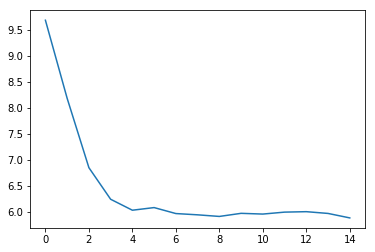

In [83]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
%matplotlib inline 
plt.figure() 
plt.plot(all_losses)